In [6]:
from scipy.io.wavfile import read 
import numpy as np
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip



#ffmpeg -i "Cutting Crew - (I Just) Died In Your Arms (Official Music Video).mp3" -sample_fmt s16 output.wav

def get_time_of_max_volume(wav_file: str):
    samplerate, data = read(wav_file)
    #only needed for 2 channel audio data
    data_flatten = data.flatten()
    index_max = np.argmax(data_flatten)
    time_max = index_max/samplerate
    return time_max

def get_duration(wav_file: str):
    samplerate, data = read(wav_file)
    return len(data)/samplerate

def get_data(wav_file: str):
    samplerate, data = read(wav_file)
    return data

def get_samplerate(wav_file: str):
    samplerate, data = read(wav_file)
    return samplerate

def get_time_vector(wav_file: str):
    time_vector = np.arange(0,duration,1/samplerate) #time vector
    return time_vector
    

data = get_data("output.wav")
samplerate = get_samplerate("output.wav")
time_max_volume = get_time_of_max_volume("output.wav")
duration = get_duration("output.wav")

print(time_max_volume)

ffmpeg_extract_subclip("output.mp4", time_max_volume, duration, targetname="test.mp4")

# print("data flatten", data_flatten)
# print("max index", index_max)
# print("max value", data_flatten[index_max])  
# print("samplerate", samplerate)
# print("max time", time_max)
# print("duration", duration)


131.17342403628118
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


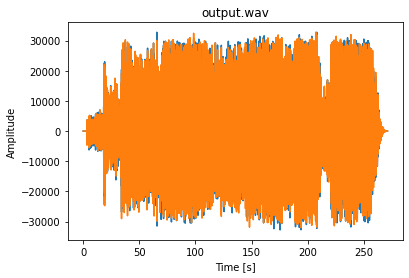

In [3]:
import matplotlib.pyplot as plt

time_vector = get_time_vector("output.wav")

plt.plot(time_vector,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('output.wav')
plt.show()